<h1>Agent-Agent Tests</h1>

We need to run agent vs agent tests, instead of just baseline vs baseline. These will allow us to actually evaluate if the agents are behaving in an expected way, or if there is a framework we need to develop to evaluate potential 'tacit collusion'. 

### imports

In [1]:
import sys, os 
import numpy as np
sys.path.append(os.path.abspath(".."))
from market_core import DuopolyEnv 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import run_episode, plot_generalized_convergence, plot_market_shares
from agent_zoo import NSRAgent, FixedPriceAgent, RandomAgent, RLAgent

## Static Market

In [33]:
env_config = {
    'market_mode': 'static',
    'production_costs': [1.0, 2.0],
    'quality': [5.0, 5.0],
    'price_sensitivity': 0.8, # Back to standard sensitivity
    'max_price': 6.0,
    'cost_std': 0.0,
    'max_steps': 10000
} 
nsr_config_1 = {
    'n_bins': 100,
    'learning_rate': 0.01,
    'quality': 5.0,           # Must match env
    'price_sensitivity': 0.8, # Must match env
    'cost': 1.0               # Agent 1's cost
}
nsr_config_2 = {
    'n_bins': 100,
    'learning_rate': 0.01,
    'quality': 5.0,           # Must match env
    'price_sensitivity': 0.8, # Must match env
    'cost': 2.0               # Agent 2's cost
}
rl_config = {
    'state_dim': 5,          # Dimension of observation space (must match env)
    'hidden_dim': 128,        # Neural network hidden size
    'n_bins': 100,           # Number of discrete price actions
    'lr': 5e-5,              # Learning rate
    'gamma': 0.99,           # Discount factor
    'epsilon': 1.0,          # Initial exploration rate
    'epsilon_decay': 0.99,  # Exploration decay per step
    'epsilon_min': 0.01,     # Minimum exploration rate
    'batch_size': 64,        # Training batch size
    'memory_size': 2000,     # Replay buffer size
}

In [34]:
env = DuopolyEnv(config=env_config)
env.reset()

/Users/alanwu/Documents/GitHub/cis-6200-final/venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/alanwu/Documents/GitHub/cis-6200-final/venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


(array([0., 0., 0., 1., 2.], dtype=float32), {})

### NSR vs NSR

In [35]:
nsr_1 = NSRAgent(env.action_space, config=nsr_config_1)
nsr_2 = NSRAgent(env.action_space, config=nsr_config_2)

In [36]:
nsr_nsr = run_episode(env, nsr_1, nsr_2, label="NSR vs NSR", train_mode=True)

Average best price P1: 3.6753045045045045
Average best price P2: 4.070807807807808


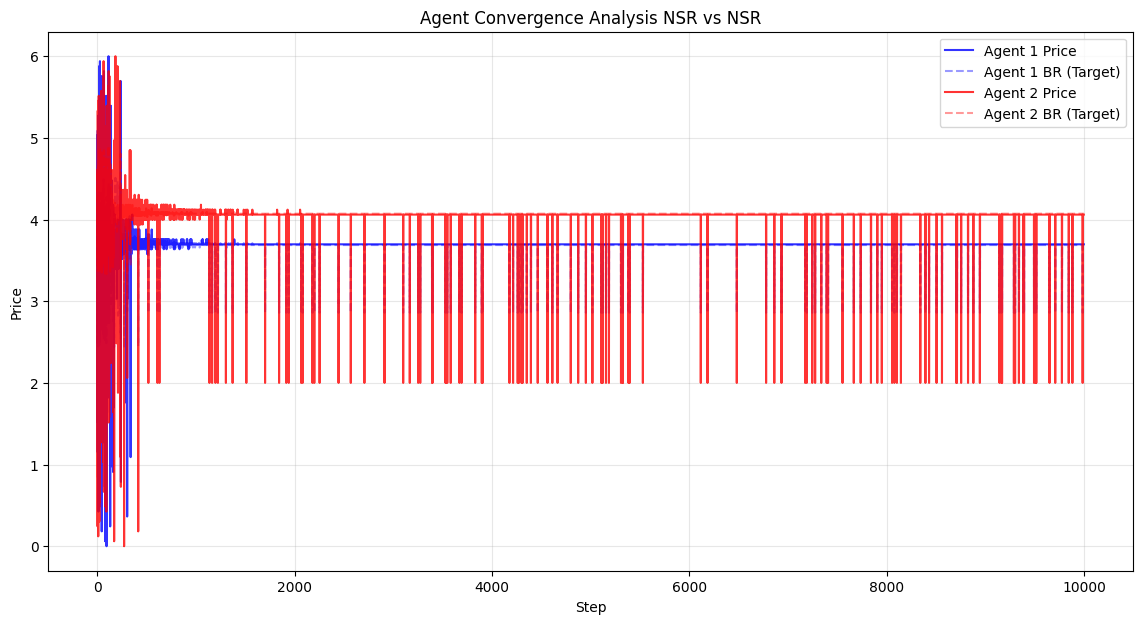

In [37]:
plot_generalized_convergence(nsr_nsr, env_config, title_suffix="NSR vs NSR")

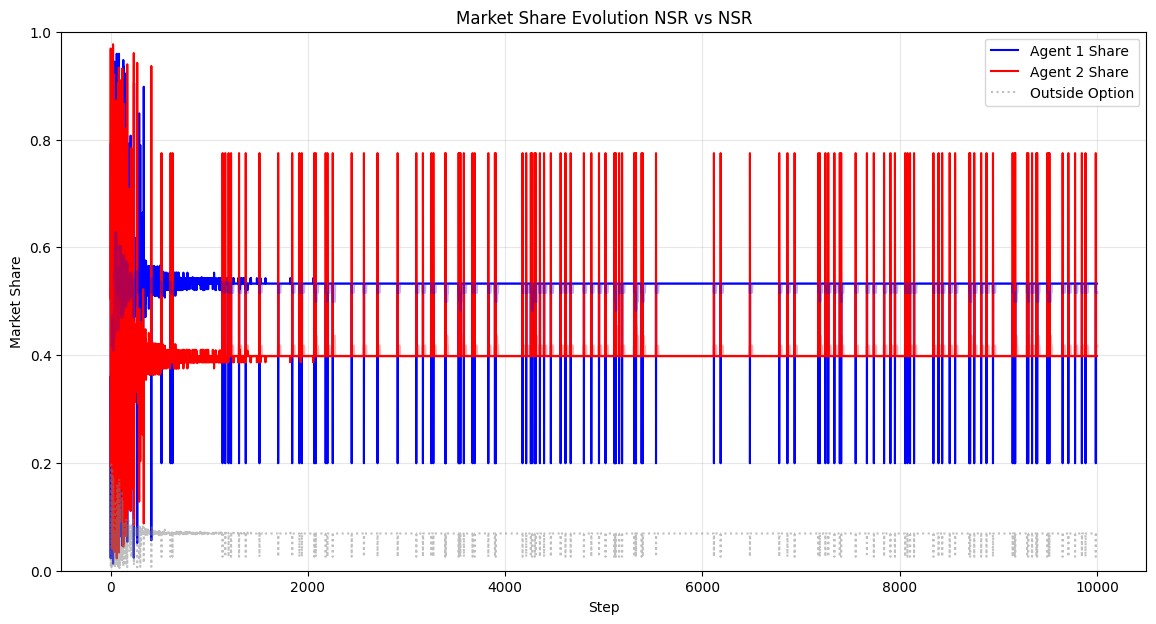

In [38]:
plot_market_shares(nsr_nsr, env_config, title_suffix="NSR vs NSR")

## Dynamic Market (AR(1))